# <center>Universidade Federal da Paraíba - UFPB</center>

## <center>Centro de Informática - CI</center>

## <center>Curso de Engenharia de Computação</center>

## Introdução ao Processamento Digital de Imagens - PDI: Módulo 1 do Trabalho Prático


#### Aluno: Epitácio Pessoa de Brito Neto

#### Matrícula: 11506856

#### Professor: Leonardo Vidal

## 0. Descrição do Trabalho

Desenvolva um sistema para abrir, exibir, manipular e salvar imagens RGB com 24 bits/pixel
(8 bits/componente/pixel). O sistema deve ter a seguinte funcionalidade:

1. Conversão RGB-YIQ-RGB (cuidado com os limites de R, G e B na volta!)

2. Negativo

3. Correlação m x n. Testar com filtros Média e Sobel

4. Compare a aplicação do filtro média 25x25 com a aplicação do filtro média 25x1
seguido pela aplicação do filtro média 1x25, em termos de tempo de processamento
e resultado final

5. Filtro mediana m x n

6. Reproduza o exemplo em
https://la.mathworks.com/help/images/ref/normxcorr2.html?lang=en com as
imagens baboon.png e babooneye.png, mas aplicando a correlação normalizada
banda a banda e tomando como resultado a média das três correlações em cada
ponto. Você pode utilizar toda a funcionalidade da linguagem de programação de
sua escolha, incluindo bibliotecas avançadas.

7. Reproduza o item 6 utilizando a função correlação desenvolvida no item 3.
O sistema deve ser desenvolvido em uma linguagem de programação de sua escolha. Não
use bibliotecas ou funções especiais de processamento de imagens imagem baboon.png e
babooneye.png, exceto no item 6, em que o uso de funções avançadas é livre. Para o item 2, duas
formas de aplicação devem ser testadas: em RGB (banda a banda) e na banda Y, com
posterior conversão para RGB. 

## 1. Introdução

  Neste trabalho de cunho avaliativo, temos como propósito a aplicação dos fundamentos teóricos da disciplina de Introdução ao Processamento Digital de Imagens, ministradas à distância pelo professor Leonardo Vidal. Ao longo destas aulas, aprendemos características de sistemas de cores, RGB e YIQ, a forma que elas funcionam, os cálculos e métricas delas e a conversão de uma para a outra, que posteriormente será abordado nesta atividade, junto com a forma negativa de uma imagem RGB, que também podemos aplicar o fundamento teórico para explicar de que forma ela se comporta quanto às cores presentes.

  Aprendemos, também, os conceitos de máscaras e filtros, junto com operações para utilizarmos os dois conceitos, descritos como convolução e correlação. Neste trabalho, mostraremos como utilizamos o conceito de correlação, aplicado a algumas máscaras e filtros que aprendemos durante a aula, estas, podemos citar: Filtro Média M x N, Filtro de Sobel (Vertical e Horizontal) M x N, Filtro Mediana M x N. A partir destas práticas, podemos ver o que a correlação pode fazer a diferença durante o processamento de uma imagem, e como a dimensão do filtro também influencia, tanto na qualidade da imagem quanto na performance do algoritmo que processará a imagem.

  Por último, iremos adquirir conhecimentos de bibliotecas feitas para uso de processamento de imagens para analisar duas imagens especificadas pelo professor e mostrar a correlação entre elas, com intuito de comparação com as funções de correlação que criamos para fazer as análises anteriores, portanto, poderemos ver que o processamento de imagens requer operações mais complexas e eficientes do que vemos em nossa introdução ao meio.

### Materiais e métodos

Utilizaremos a linguagem de programação Python 3, juntamente com as funcionalidades básicas da linguagem com suas bibliotecas, portanto, utilizaremos funções com intuito de: 

I. Abrir e ler as imagens recebidas pelo professor; 

II. Conversão das mesmas em matrizes (ou np.arrays) para podermos trabalhá-las com as funcionalidades da linguagem;

III. Abrir e ler as máscaras feitas em arquivos de texto para usá-las na operação de correlação (a motivação será dita posteriormente);

IV. Comandos para leitura das imagens recebidas, trabalhadas e alteradas, para análise das mesmas;

V. Comando para salvar as imagens trabalhadas na máquina local;


### Bibliotecas e variáveis globais

In [1]:
%matplotlib inline
from scipy import signal
import os
from PIL import Image
from matplotlib.pyplot import imshow, imsave, clf
from matplotlib import pyplot as plt
import numpy as np
import math, time, random, datetime
import cv2


global sobelVertical
sobelVertical = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
global sobelHorizontal
sobelHorizontal = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
global media_3x3
media_3x3 = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

### Declaração de funções

In [28]:
def correlacao(imagem, mask, m, n):
    start_time = time.time()
    corr = np.zeros([imagem.shape[0]-(m-1),imagem.shape[1]-(n-1), 3], dtype = 'uint8')
    
    for linha in range(0, corr.shape[0]): 
        for coluna in range(0, corr.shape[1]): 
            for linha_mask in range(0,m):
                    for coluna_mask in range(0,n):
                        corr[linha,coluna,0] += mask[linha_mask,coluna_mask]*imagem[linha+linha_mask,coluna+coluna_mask,0]
                        corr[linha,coluna,1] += mask[linha_mask,coluna_mask]*imagem[linha+linha_mask,coluna+coluna_mask,1]
                        corr[linha,coluna,2] += mask[linha_mask,coluna_mask]*imagem[linha+linha_mask,coluna+coluna_mask,2]

    corr  = np.clip(corr, a_min = 0, a_max = 255) 
    
    
    processing_time = time.time() - start_time
    print("\nProcessing time: %s seconds \n" % "{0:.3f}".format(processing_time))
    
    imshow(corr)
    imsave('images/' + 'correlacao' + '.png', corr)

    
def media(imagem, m, n):
    start_time = time.time()
    med = np.zeros([imagem.shape[0]-(m-1),imagem.shape[1]-(n-1), 3], dtype = 'uint8')

    for linha in range(0, med.shape[0]): 
        for coluna in range(0,  med.shape[1]): 
            listaR = []
            listaG = []
            listaB = []
            for linha_mask in range(0,m):
                    for coluna_mask in range(0,n):
                        listaR.append(imagem[linha+linha_mask,coluna+coluna_mask,0])
                        listaG.append(imagem[linha+linha_mask,coluna+coluna_mask,1])
                        listaB.append(imagem[linha+linha_mask,coluna+coluna_mask,2])
            med[linha,coluna,0] = np.mean(listaR)
            med[linha,coluna,1] = np.mean(listaG)
            med[linha,coluna,2] = np.mean(listaB)
    
    
    processing_time = time.time() - start_time
    print("\nProcessing time: %s seconds \n" % "{0:.3f}".format(processing_time))
    
    imshow(med)
    imsave('images/' + 'media' + '.png', med)


def abrir_imagem(path):
    filename, file_extension = os.path.splitext(path)

    imagem = Image.open(path)

    return imagem


def RGBYIQ(imagem):
    
    RGB_YIQ = np.array([ [ +0.299,      +0.587,      +0.114],
                            [ +0.59590059, -0.27455667, -0.32134392],
                            [ +0.21153661, -0.52273617, +0.31119955]])
        
    imagem_YIQ = np.dot(imagem, RGB_YIQ.T)
    
    return imagem_YIQ


def YIQRGB(imagem):
    
    YIQ_RGB = np.array([ [ +1.0, +0.9563, +0.6210],
                            [ +1.0, -0.2721, -0.6474],
                            [ +1.0, -1.1070, +1.7046]])
    
    imagem_RGB = np.dot(imagem, YIQ_RGB.T)
    imagem_RGB = imagem_RGB.astype(int)
    imagem_RGB  = np.clip(imagem_RGB , a_min = 0, a_max = 255) 

    return imagem_RGB
    

def mediana(imagem, m, n):
    start_time = time.time()
    med = np.zeros([imagem.shape[0]-(m-1),imagem.shape[1]-(n-1), 3], dtype = 'uint8')

    for linha in range(0, med.shape[0]): 
        for coluna in range(0,  med.shape[1]): 
            listaR = []
            listaG = []
            listaB = []
            for linha_mask in range(0,m):
                    for coluna_mask in range(0,n):
                        listaR.append(imagem[linha+linha_mask,coluna+coluna_mask,0])
                        listaG.append(imagem[linha+linha_mask,coluna+coluna_mask,1])
                        listaB.append(imagem[linha+linha_mask,coluna+coluna_mask,2])
            med[linha,coluna,0] = np.median(listaR)
            med[linha,coluna,1] = np.median(listaG)
            med[linha,coluna,2] = np.median(listaB)
            
    processing_time = time.time() - start_time
    print("\nProcessing time: %s seconds \n" % "{0:.3f}".format(processing_time))
    
    imshow(med)
    imsave('images/' + 'mediana' + '.png', med)
    
    
def ler_arquivo_mascara(mask_path):
    f = open(mask_path,"r")

    m = int(f.readline())
    n = int(f.readline())

    list = []
    for lines in f:
        value = lines.split()
        list.append(value)

    mask = np.asarray(list)
        
    return mask, m, n

## 2. Conversão RGB-YIQ e YIQ-RGB

Primeiramente, abrimos a imagem original:

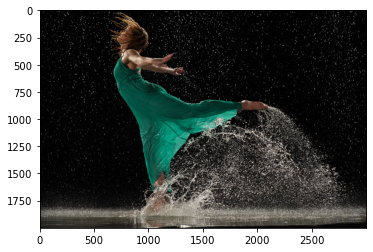

In [3]:
imagem_path = 'C:\\Users\\Epitacio\\Imagens\\2817540617.jpg'

imagem = abrir_imagem(imagem_path)
imagem = np.array(imagem, dtype='int')
imagem  = np.clip(imagem, a_min = 0, a_max = 255) 

imshow(imagem)

### Conversão RGB-YIQ

Como sabemos, a imagem representada acima é lida computacionalmente como uma matriz. Dito isto, em nossas aulas síncronas, pudemos estudar o que deve ser feito para haver uma conversão entre uma imagem RGB em YIQ, desta forma, com a função RGBYIQ(), converteremos a matriz original multiplicando-a pela matriz que pode ser lida abaixo:

$$\begin{bmatrix} 0.299 & 0.587 & 0.114 \\ 0.59590059 & -0.27455667 & -0.32134392 \\ 0.21153661 & -0.52273617 & 0.31119955 \end{bmatrix}$$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


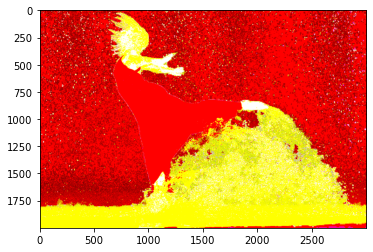

In [4]:
imagem_YIQ = RGBYIQ(imagem)
imshow(imagem_YIQ)

### Conversão YIQ-RGB

Para chegarmos novamente à imagem original, precisaremos utilizar a função YIQRGB() que, basicamente, utilizará a multiplicação da matriz YIQ convertida anteriormente e multiplicá-la pela matriz abaixo:

$$\begin{bmatrix} 1 & 0.9563 & 0.6210 \\ 1 & -0.2721 & -0.6474 \\ 1 & -1.107 & 1.7046 \end{bmatrix}$$


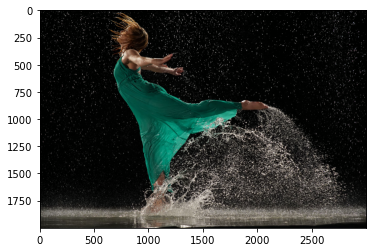

In [5]:
imagem_RGB = YIQRGB(imagem_YIQ)
imshow(imagem_RGB)

### Representação da imagem em cada banda (RGB)

Sabemos que a imagem original é composta por três cores: vermelha, verde e azul (RGB). Com isto, aplicaremos este conhecimento para analisar a importância de cada cor na composição da imagem original, analisando-a banda a banda com apenas uma cor. Sabemos que os valores dos índices que nos informam a cor são: 0 (vermelho), 1 (verde), 2 (azul). Usando esta informação, temos as seguintes representações, banda a banda:

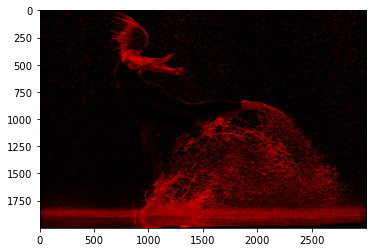

In [6]:
imagem = np.array(imagem, dtype='int')
red = np.zeros(imagem.shape, 'uint8')
red[...,0] = imagem[...,0]

plt.imshow(red)

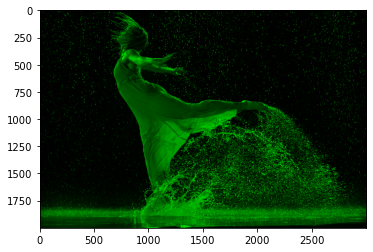

In [7]:
imagem = np.array(imagem, dtype='int')
green = np.zeros(imagem.shape, 'uint8')
green[...,1] = imagem[...,1]

plt.imshow(green)

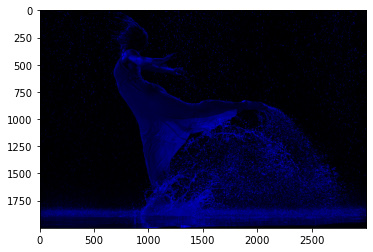

In [8]:
imagem = np.array(imagem, dtype='int')
blue = np.zeros(imagem.shape, 'uint8')
blue[...,2] = imagem[...,2]

plt.imshow(blue)

Percebemos que, ao longo da imagem referente à cor vermelha, a presença da mesma no vestido praticamente não existe, assim como notamos uma escassez da cor azul e vermelha com relação às estrelas. Em seguida, temos o resultado da soma das imagens R, G e B, que devem resultar na imagem original.

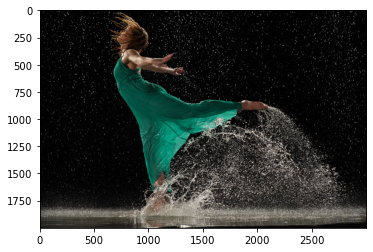

In [9]:
plt.imshow(red + green + blue)

### Imagens com duas cores presentes

Para continuar analisando banda a banda, iremos construir três imagens, cada uma com uma cor faltando, ou seja, a imagem feita por duas cores.

### Imagem sem o vermelho

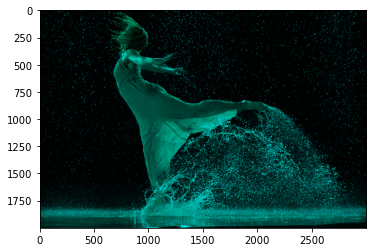

In [10]:
imagem_n_red = imagem - red
imshow(imagem_n_red)

Como podemos ver, a cor vermelha possui pouca influência dentro desta imagem, já que continuamos percebendo detalhes significativos da imagem com a cor ciano, resultado da imagem ser composta apenas pelas cores azul e verde. 

### Imagem sem o verde

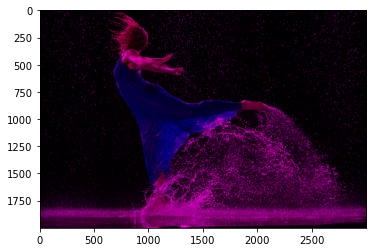

In [11]:
imagem_n_green = imagem - green
imshow(imagem_n_green)

Nesta, podemos nota a influência que o verde possui (e o vermelho não) na imagem quanto ao vestido já que, ao tirarmos a cor verde, o vestido recebeu a tonalidade azul. Nas outras partes da imagem, chegamos à cor magenta, resultado da combinação do vermelho com o azul.

### Imagem sem o azul

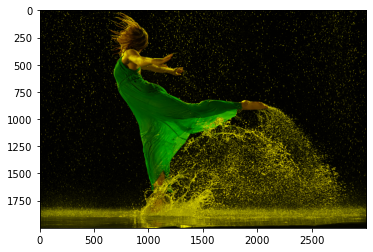

In [12]:
imagem_n_blue = imagem - blue
imshow(imagem_n_blue)

Novamente, podemos destacar que, quanto ao vestido, a cor vermelha não possui qualquer influência nela, resultando na cor verde, na ausência da cor azul. Quanto ao restante da imagem, chegamos à cor amarela, resultado da presença apenas das cores vermelha e verde.

## 3. Negativo

Quanto à análise do Negativo da imagem, lembremos que uma imagem RGB é composta por números no intervalo [0,255], desta forma, se queremos o negativo dela, apenas subtraímos o maior valor possível (255) em cada ponto da matriz.

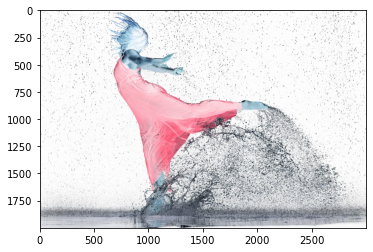

In [13]:
imagem = np.array(imagem, dtype='int')
imagem  = np.clip(imagem, a_min = 0, a_max = 255) 

negativo_imagem = 255 - imagem
imshow(negativo_imagem)

Sustentando as análises banda a banda anteriores, o vestido, no negativo, é mostrado por uma cor avermelhada, explicitando a ausência da mesma. Além disso, temos o esperado: O fundo preto agora está branco, as cores brancas da água e das estrelas agora possuem uma tonalidade escura, próxima ao preto.

### Negativo apenas na banda vermelha

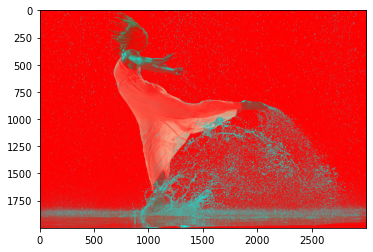

In [14]:
imagem_vermelha = np.zeros(imagem.shape, dtype='int')
imagem_vermelha = imagem.copy()
imagem_vermelha[:,:,0] = 255 - imagem_vermelha[:,:,0]

clf()
imshow(imagem_vermelha)

A imagem acima faz sentido principalmente se analisarmos em conjunto da imagem negativa anterior. O fundo, que em negativo estava branco, neste está com um vermelho muito forte. Já a parte mais escura, como estava a água e as estrelas, com o negativo na banda vermelha, a tonalidade está próxima da cor ciano, vista anteriormente.

### Negativo apenas na banda verde

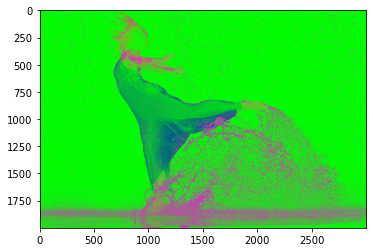

In [15]:
imagem_verde = np.zeros(imagem.shape, dtype='int')
imagem_verde = imagem.copy()
imagem_verde[:,:,1] = 255 - imagem[:,:,1]

clf()
imshow(imagem_verde)

Também está coerente, dado que a parte branca, no negativo, agora possui um verde nítido e as partes que continham um tom claro, está semelhante à cor magenta, vista anteriormente, resultado da falta de verde nas cores claras.

### Negativo apenas na banda azul

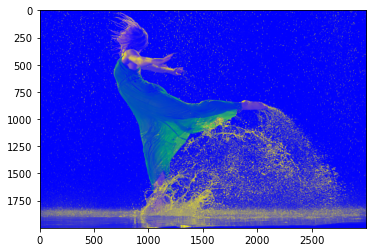

In [16]:
imagem_azul = np.zeros(imagem.shape, dtype='int')
imagem_azul = imagem.copy()
imagem_azul[:,:,2] = 255 - imagem[:,:,2]

clf()
imshow(imagem_azul)

Na situação de negativo na banda azul, possuímos o fundo completamente azul e os t ons claros da água e estrelas possuem a tonalidade amarela, também vistas em análises anteriores na falta da cor azul e presença das cores vermelha e verde.

### Negativo em Y

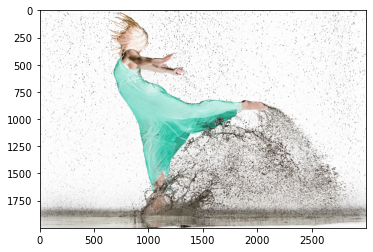

In [17]:
imagem_YIQ = RGBYIQ(imagem)
imagem_YIQ[:,:,0] = 255 - imagem_YIQ[:,:,0]
imagem_RGB = YIQRGB(imagem_YIQ)

imshow(imagem_RGB)

## 4. Correlação M x N. Testar com os filtros Média e Sobel

Ao entendermos que a ideia de correlação parte do produto interno entre a máscara (filtro) em cada região R, G e B, utilizamos o conhecimento para criar a função correlacao() que, a partir de filtros representados por np.arrays (como o filtro Média 3x3, filtro de Sobel Vertical e filtro de Sobel Horizontal) ou por filtros retirados de arquivos de texto (como o filtro Média 25x25, filtro Média 1x25 e filtro Média 25x1) onde usamos a função ler_arquivo_mascara() para retirarmos os valores de M e N e a matriz que corresponde ao filtro, dada a necessidade que será explicada posteriormente. Sabendo disso, avaliaremos a função correlacao() pela saída da imagem resultante da operação (dado o filtro que foi utilizado para esta) e a velocidade de processamento.

### Correlação 3x3 utilizando a máscara de média 3x3, representada pelo np.array media_3x3, declarado no início do trabalho.


Processing time: 446.548 seconds 



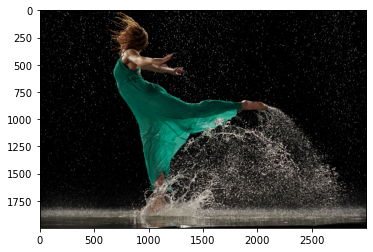

In [18]:
m = 3
n = 3

imagem_path = 'C:\\Users\\Epitacio\\Imagens\\2817540617.jpg'

imagem = abrir_imagem(imagem_path)
imagem = np.array(imagem, dtype='uint8')
imagem  = np.clip(imagem, a_min = 0, a_max = 255)

correlacao(imagem, media_3x3, m, n)

Como podemos observar, a função correlacao(), dado um m e n pequenos, a imagem perde pouca informação, principalmente pela resolução da imagem utilizada e, quanto ao processamento, existe um tempo considerável para a aplicação.

### Correlação 3x3 utilizando a máscara com o filtro de Sobel Vertical, representada pelo np.array declarado no início do trabalho.


Processing time: 434.388 seconds 



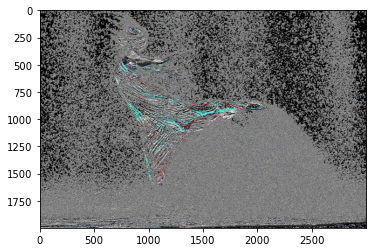

In [19]:
correlacao(imagem, sobelVertical, m, n)

### Correlação 3x3 utilizando a máscara com o filtro de Sobel Horizontal, representada pelo np.array declarado no início do trabalho.


Processing time: 435.417 seconds 



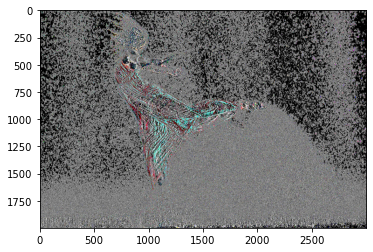

In [20]:
correlacao(imagem, sobelHorizontal, m, n)

### Casos de teste

Para os casos de teste 25x25, 1x25 e 25x1, diferente dos teste com np.arrays anteriores, tivemos que fazer uma máscara a partir de um arquivo de texto, dado que a linguagem lida de forma problemática com a declaração de arrays maiores. Por essa necessidade, foi criada a função ler_arquivo_mascara() e, nele, temos os valores para m e n, como a matriz preenchida com os valores, representado a máscara.

### Correlação 25x1 utilizando a média


Processing time: 30.046 seconds 



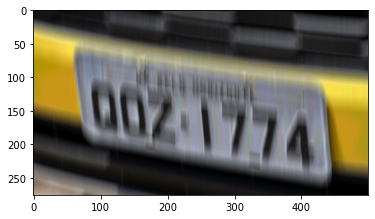

In [21]:
imagem_path = 'C:\\Users\\Epitacio\\Imagens\\Detran_Minas-Gerais.jpg'
mask_path = 'C:\\Users\\Epitacio\\Imagens\\25x1.txt'

mask, m, n = ler_arquivo_mascara(mask_path)
mask = mask.astype(float)

imagem = abrir_imagem(imagem_path)
imagem = np.array(imagem, dtype='int')
imagem  = np.clip(imagem, a_min = 0, a_max = 255) 

correlacao(imagem, mask, m, n)

### Correlação 1x25 utilizando a média


Processing time: 29.244 seconds 



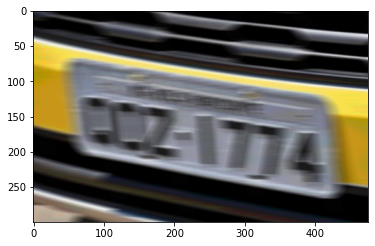

In [22]:
mask_path = 'C:\\Users\\Epitacio\\Imagens\\1x25.txt'

mask, m, n = ler_arquivo_mascara(mask_path)
mask = mask.astype(float)

imagem = abrir_imagem(imagem_path)
imagem = np.array(imagem, dtype='int')
imagem  = np.clip(imagem, a_min = 0, a_max = 255) 

correlacao(imagem, mask, m, n)

### Correlação 25x25 utilizando a média


Processing time: 670.134 seconds 



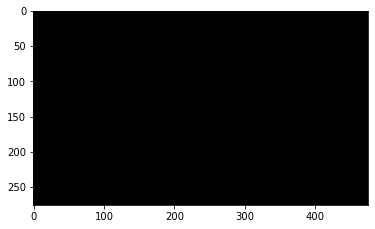

In [23]:
mask_path = 'C:\\Users\\Epitacio\\Imagens\\25x25.txt'

mask, m, n = ler_arquivo_mascara(mask_path)
mask = mask.astype(float)

imagem = abrir_imagem(imagem_path)
imagem = np.array(imagem, dtype='int')
imagem  = np.clip(imagem, a_min = 0, a_max = 255) 

correlacao(imagem, mask, m, n)

Podemos destacar que, tanto a correlação 25x1 e 1x25 possuem um tempo de processamento próximo, no entanto, a imagem resultante do filtro 25x1, aparentemente, possui as letras da placa do veículo mais legíveis, onde a imagem resultante do filtro de correlação 1x25 se mostra mais borrada. Quanto à correlação 25x25, a imagem foi comprometida pelo número de operações feitas para o cálculo da correlação, que pode ser notada pelo tempo de processamento que levou.

### Teste do filtro Média, criado à parte

Para fins de comparação, criamos uma função media() que irá aplicar o filtro Média M x N em uma das imagens dadas, de forma que possamos comparar a aplicação de um filtro Média com o filtro Mediana (ambos com os mesmos valores para M e N) que foi pedido e será abordado posteriormente.

### Filtro Média 25x25


Processing time: 170.240 seconds 



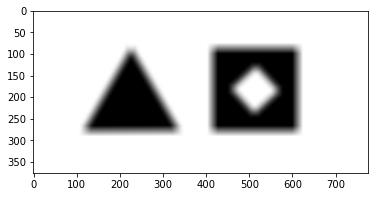

In [24]:
m = 25
n = 25

imagem_path = 'C:\\Users\\Epitacio\\Imagens\\CNN1.png'

imagem = abrir_imagem(imagem_path)
imagem = np.array(imagem, dtype='uint8')
imagem  = np.clip(imagem, a_min = 0, a_max = 255)

media(imagem, m, n)

## 5. Filtro Mediana M x N

### Filtro Mediana 25x25


Processing time: 201.490 seconds 



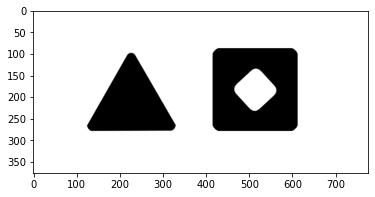

In [29]:
m = 25
n = 25

imagem_path = 'C:\\Users\\Epitacio\\Imagens\\CNN1.png'

imagem = abrir_imagem(imagem_path)
imagem = np.array(imagem, dtype='uint8')
imagem  = np.clip(imagem, a_min = 0, a_max = 255)

mediana(imagem, m, n)

O que podemos destacar quando comparamos os dois filtros é a nitidez da imagem quando utilizamos o filtro Mediana, enquanto no filtro Média chegamos à uma imagem borrada. Temos isto e também a alteração no formato da imagem em ambos os filtros, onde as pontas dos vértices são suavizadas e aparentam serem curvados, após a aplicação. Quanto ao processamento, a diferença entre as duas não é significativa o suficiente (neste caso) para querermos utilizar o filtro Média no lugar do filtro Mediana, que claramente possui uma qualidade maior na imagem.

## 6. Correlação entre Baboon e Babooneye utilizando bibliotecas

Para fins de conhecimento no uso das bibliotecas, faremos a correlação entre duas imagens: Baboon e Babooneye, banda a banda e o resultado será a média entre as correlações resultantes. Para fazermos esta aplicação, utilizaremos a biblioteca do OpenCV, que possui funções auxiliares bem simples e eficazes. Vale destacar que, ao utilizarmos as funções do OpenCV, a lógica numérica dos índices que representam cada cor irão mudar, ou seja, ou invés de RGB, a representação é dada por BGR, implicando que os valores dos índices mudaram para: 2 (vermelho), 1 (verde) e 0 (azul).

Também é importante comentar que a função cv2.imwrite(), utilizada para salvar as imagens banda a banda, retorna uma imagem grayscale daquela banda, então, tanto as imagens das bandas quanto as imagens das correlações serão demonstradas em grayscale, o que não significa que as cores não estão presentes. Primeiramente, mostraremos as imagens iniciais que irão ser trabalhadas e, em seguida, a análise de correlação banda a banda.

<ipython-input-30-89f62fe976fd>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


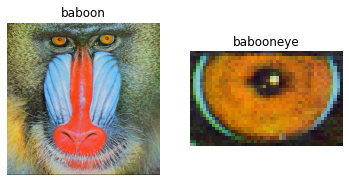

In [30]:
path1 = 'C:\\Users\\Epitacio\\Imagens\\baboon.png'
path2 = 'C:\\Users\\Epitacio\\Imagens\\babooneye.png'

imagem = abrir_imagem(path1)
imagem = np.array(imagem, dtype='int')
imagem  = np.clip(imagem, a_min = 0, a_max = 255) 

imagem1 = abrir_imagem(path2)
imagem1 = np.array(imagem1, dtype='int')
imagem1  = np.clip(imagem1 , a_min = 0, a_max = 255)

fig, (ax_orig, ax_conv) = plt.subplots(1, 2)

ax_orig.imshow(imagem)
ax_orig.set_title('baboon')
ax_orig.set_axis_off()

ax_conv.imshow(imagem1)
ax_conv.set_title('babooneye')
ax_conv.set_axis_off()

fig.show()

### Correlação com a banda Vermelha

In [31]:
baboon = cv2.imread(path1, cv2.IMREAD_UNCHANGED)
babooneye = cv2.imread(path2, cv2.IMREAD_UNCHANGED)

red_channel = baboon[:,:,2]
red_channel = np.array(red_channel, dtype='int')
red_channel  = np.clip(red_channel, a_min = 0, a_max = 255) 


red_channel1 = babooneye[:,:,2]
red_channel1 = np.array(red_channel1, dtype='uint8')
red_channel1  = np.clip(red_channel1, a_min = 0, a_max = 255) 


cv2.imwrite('D:/cv2-red-channel.png',red_channel) 
cv2.imwrite('D:/cv2-red-channel1.png',red_channel1) 

True

<ipython-input-32-bbafcbc78689>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


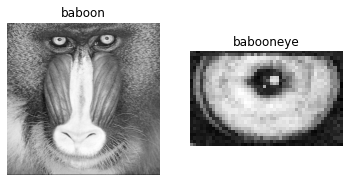

In [32]:
imagem_path = 'D:/cv2-red-channel.png'
imagem_path1 = 'D:/cv2-red-channel1.png'


imagem = abrir_imagem(imagem_path)
imagem = np.array(imagem, dtype='int')
imagem  = np.clip(imagem, a_min = 0, a_max = 255) 

imagem1 = abrir_imagem(imagem_path1)
imagem1 = np.array(imagem1, dtype='int')
imagem1  = np.clip(imagem1, a_min = 0, a_max = 255)

fig, (ax_orig, ax_conv) = plt.subplots(1, 2)

ax_orig.imshow(imagem, cmap='gray')
ax_orig.set_title('baboon')
ax_orig.set_axis_off()

ax_conv.imshow(imagem1, cmap='gray')
ax_conv.set_title('babooneye')
ax_conv.set_axis_off()

fig.show()

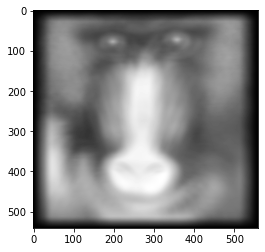

In [33]:
corr = signal.correlate2d(red_channel, red_channel1)
cv2.imwrite('D:/cv2-corr-red-channel.png',corr)
imshow(corr, cmap='gray')

### Correlação com a banda verde

In [34]:
baboon = cv2.imread(path1, cv2.IMREAD_UNCHANGED)
babooneye = cv2.imread(path2, cv2.IMREAD_UNCHANGED)

green_channel = baboon[:,:,1]
green_channel = np.array(green_channel, dtype='int')
green_channel  = np.clip(green_channel, a_min = 0, a_max = 255) 

green_channel1 = babooneye[:,:,1]
green_channel1 = np.array(green_channel1, dtype='int')
green_channel1  = np.clip(green_channel1, a_min = 0, a_max = 255) 

cv2.imwrite('D:/cv2-green-channel.png',green_channel) 
cv2.imwrite('D:/cv2-green-channel1.png',green_channel1) 

True

<ipython-input-35-e1b1174c3b93>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


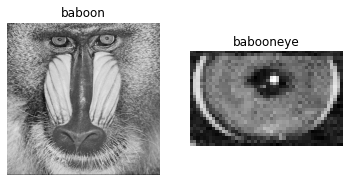

In [35]:
imagem_path = 'D:/cv2-green-channel.png'
imagem_path1 = 'D:/cv2-green-channel1.png'

imagem = abrir_imagem(imagem_path)
imagem = np.array(imagem, dtype='int')
imagem  = np.clip(imagem, a_min = 0, a_max = 255) 

imagem1 = abrir_imagem(imagem_path1)
imagem1 = np.array(imagem1, dtype='int')
imagem1  = np.clip(imagem1 , a_min = 0, a_max = 255)

fig, (ax_orig, ax_conv) = plt.subplots(1, 2)

ax_orig.imshow(imagem, cmap='gray')
ax_orig.set_title('baboon')
ax_orig.set_axis_off()

ax_conv.imshow(imagem1, cmap='gray')
ax_conv.set_title('babooneye')
ax_conv.set_axis_off()

fig.show()

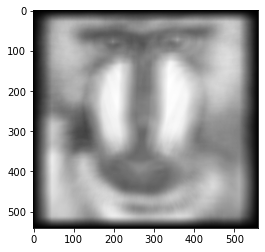

In [36]:
corr1 = signal.correlate2d(green_channel, green_channel1)
cv2.imwrite('D:/cv2-corr-green-channel.png',corr1)
imshow(corr1, cmap='gray')

### Correlação com a banda azul

In [37]:
baboon = cv2.imread(path1, cv2.IMREAD_UNCHANGED)
babooneye = cv2.imread(path2, cv2.IMREAD_UNCHANGED)

blue_channel = baboon[:,:,0]
blue_channel = np.array(blue_channel, dtype='int')
blue_channel  = np.clip(blue_channel, a_min = 0, a_max = 255) 

blue_channel1 = babooneye[:,:,0]
blue_channel1 = np.array(blue_channel1, dtype='int')
blue_channel1  = np.clip(blue_channel1, a_min = 0, a_max = 255) 

cv2.imwrite('D:/cv2-blue-channel.png',blue_channel) 
cv2.imwrite('D:/cv2-blue-channel1.png',blue_channel1)

True

<ipython-input-38-1f0c09941481>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


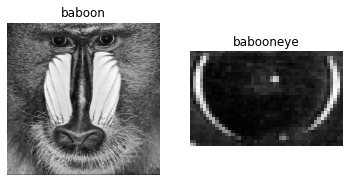

In [38]:
imagem_path = 'D:/cv2-blue-channel.png'
imagem_path1 = 'D:/cv2-blue-channel1.png'

imagem = abrir_imagem(imagem_path)
imagem = np.array(imagem, dtype='int')
imagem  = np.clip(imagem, a_min = 0, a_max = 255) 

imagem1 = abrir_imagem(imagem_path1)
imagem1 = np.array(imagem1, dtype='int')
imagem1  = np.clip(imagem1 , a_min = 0, a_max = 255)

fig, (ax_orig, ax_conv) = plt.subplots(1, 2)

ax_orig.imshow(imagem, cmap='gray')
ax_orig.set_title('baboon')
ax_orig.set_axis_off()

ax_conv.imshow(imagem1, cmap='gray')
ax_conv.set_title('babooneye')
ax_conv.set_axis_off()

fig.show()

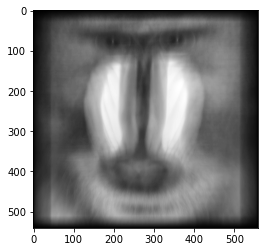

In [39]:
corr2 = signal.correlate2d(blue_channel, blue_channel1)
cv2.imwrite('D:/cv2-corr-blue-channel.png',corr2)
imshow(corr2, cmap='gray')

### Média das três bandas

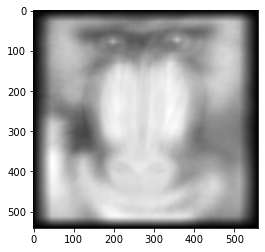

In [40]:
med = (corr + corr1 + corr2)/3
cv2.imwrite('D:/cv2-corr-three-channels.png',med)
imshow(med, cmap='gray')

### 7. Correlação de Baboon e Babooneye com função de correlação própria

De forma que possamos comparar a utilização da biblioteca OpenCV com as funções criadas, iremos pegar o mesmo caso de teste anterior e o faremos utilizando a função correlacao() criada.

### Teste com a banda Azul

In [41]:
path1 = 'C:\\Users\\Epitacio\\Imagens\\baboon.png'
path2 = 'C:\\Users\\Epitacio\\Imagens\\babooneye.png'

m = 3
n = 3

imagem = abrir_imagem(path1)
imagem = np.array(imagem, dtype='uint8')

blue = np.zeros(imagem.shape, 'uint8')
blue[...,2] = imagem[...,2]

imagem1 = abrir_imagem(path2)
imagem1 = np.array(imagem1, dtype='uint8')

blue1 = np.zeros(imagem1.shape, 'uint8')
blue1[...,2] = imagem1[...,2]


Processing time: 19.899 seconds 



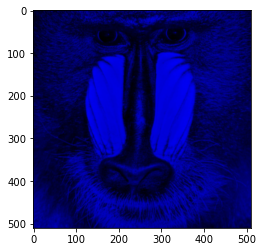

In [42]:
minha_corr1 = correlacao(blue, media_3x3, m, n)


Processing time: 0.103 seconds 



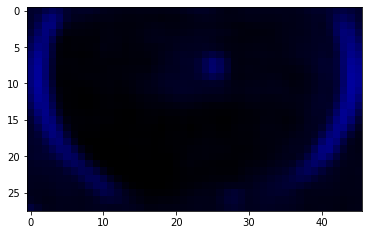

In [43]:
minha_corr2 = correlacao(blue1, media_3x3, m, n)

### Teste com a banda Verde

In [44]:
imagem = abrir_imagem(path1)
imagem = np.array(imagem, dtype='uint8')

green = np.zeros(imagem.shape, 'uint8')
green[...,1] = imagem[...,1]

imagem1 = abrir_imagem(path2)
imagem1 = np.array(imagem1, dtype='uint8')

green1 = np.zeros(imagem1.shape, 'uint8')
green1[...,1] = imagem1[...,1]


Processing time: 20.960 seconds 



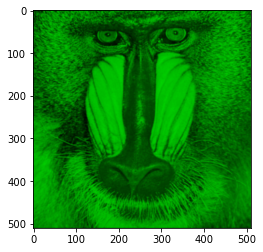

In [45]:
minha_corr3 = correlacao(green, media_3x3, m, n)


Processing time: 0.102 seconds 



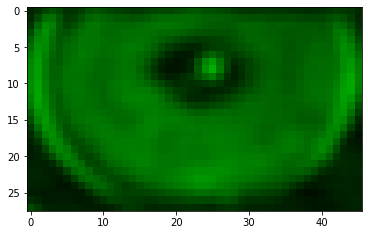

In [46]:
minha_corr4 = correlacao(green1, media_3x3, m, n)

### Teste com a banda Vermelha

In [47]:
imagem = abrir_imagem(path1)
imagem = np.array(imagem, dtype='uint8')

red = np.zeros(imagem.shape, 'uint8')
red[...,0] = imagem[...,0]

imagem1 = abrir_imagem(path2)
imagem1 = np.array(imagem1, dtype='uint8')

red1 = np.zeros(imagem1.shape, 'uint8')
red1[...,0] = imagem1[...,0]


Processing time: 21.320 seconds 



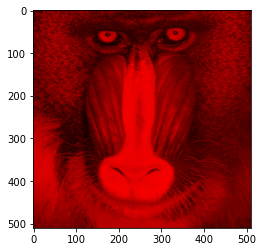

In [48]:
minha_corr5 = correlacao(red, media_3x3, m, n)


Processing time: 0.098 seconds 



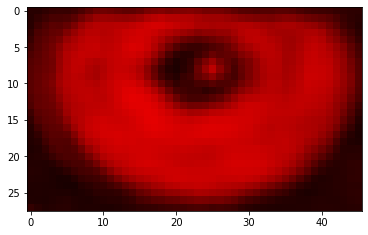

In [49]:
minha_corr6 = correlacao(red1, media_3x3, m, n)

### Média das correlações

In [51]:
path1 = 'C:\\Users\\Epitacio\\images\\convol.png'
path2 = 'C:\\Users\\Epitacio\\images\\convol1.png'
path3 = 'C:\\Users\\Epitacio\\images\\convol2.png'
path4 = 'C:\\Users\\Epitacio\\images\\convol3.png'
path5 = 'C:\\Users\\Epitacio\\images\\convol4.png'
path6 = 'C:\\Users\\Epitacio\\images\\convol5.png'

imagem1 = abrir_imagem(path1)
imagem1 = np.array(imagem1, dtype='int')

imagem2 = abrir_imagem(path2)
imagem2 = np.array(imagem2, dtype='int')

imagem3 = abrir_imagem(path3)
imagem3 = np.array(imagem3, dtype='int')

imagem4 = abrir_imagem(path4)
imagem4 = np.array(imagem4, dtype='int')

imagem5 = abrir_imagem(path5)
imagem5 = np.array(imagem5, dtype='int')

imagem6 = abrir_imagem(path6)
imagem6 = np.array(imagem6, dtype='int')


im = np.add(imagem1,imagem2)
im += np.add(imagem3,imagem4)
im += np.add(imagem5,imagem6)
im = im/6
imshow(im)

ValueError: operands could not be broadcast together with shapes (510,510,4) (28,46,4) 

## 8. Discussão

Ao falarmos de resultados, podemos ver que, ao longo da análise no que se diz respeito às conversões (tanto RGB-YIQ quanto YIQ-RGB) chegamos no esperado, dado que são aplicações simples. Durante a análise banda a banda dos negativos da imagem, também conseguimos chegar no resultado satisfatível, dada a coerência de cada imagem com a análise feita logo após o resultado da operação foi mostrada. Em relação às correlações e aos filtros, chegamos em resultados interessantes para cada imagem e filtro diferentes apesar de que, em alguns casos (como o Correlação Média 25x25), não conseguimos chegar na imagem resultante devido a pouca otimização do código feito, que também comprometeu o tempo de processamento em tempo mais prolongados. No entanto, ao utilizarmos a correlação Média 1x25 e 25x1, chegamos num tempo razoável de processamento e, mesmo que as imagens tenham ficado borradas após a operação, dado o tamanho das máscaras, era o esperado. Os filtros Média e Mediana também reproduziram resultados satisfatórios, com um tempo de processamento razoável.

Quanto à análise de correlação entre Baboon e Babooneye, a dificuldade, ironicamente, foi trabalhar com a biblioteca OpenCV. Enquanto seguíamos uma lógica "simples" durante as operações anteriores, ao utilizarmos a biblioteca nos deparamos com problemas com dimensões para com os np.arrays, problemas de tipagem das variáveis (como tipos int32 e uint8 para certas funções da biblioteca) e o aprendizado em análise de cores por grayscale, que também se tornou um problema, pois a intenção que tivemos durante a criação do trabalho era mostrar as imagens em formato RGB e não conseguimos convertê-las de volta para a cor original sem ter problemas de tipagem e/ou dimensões de arrays para, em seguida, usar a função cv2.correlate2d(). Conseguimos fazer a correlação banda a banda das imagens Baboon e Babooneye, no entanto, não conseguimos estabelecer uma lógica para chegarmos na média entre as correlações da mesma forma que fizemos por meio da biblioteca OpenCV, onde as operações aritméticas podiam ser feitas de forma simples, não foi o mesmo quando utilizamos a mesma lógica para quando fizemos por nossas funções criadas.

## 9. Conclusão

No geral, chegamos em resultados positivos, pudemos aplicar diversos conceitos aprendidos em sala de aula em um trabalho prático. Conseguimos entender que o mundo do processamento digital está longe de ser a "simplicidade" que estudamos como introdução ao meio, já que, ao procurarmos respostas em documentações (principalmente quando utilizamos a biblioteca OpenCV), as funções criadas por nós à partir dos conhecimentos introdutórios não chegam perto da complexidade de uma biblioteca especializada, tanto pela eficiência quanto pela qualidade da imagem (era esperado, afinal, no momento em que nos aprofundamos no assunto de qualquer ensino, este sempre será complexo, principalmente aos olhos de quem está se introduzindo ao meio).

Contudo, tanto os aprendizados que pudemos ter em sala quanto o que buscamos durante a construção deste trabalho foram ótimos introdutórios ao assunto, tanto em conhecimento quanto no interesse à área e suas diferentes aplicações. E isto se deve graças ao material (vídeos, slides e informações) disponibilizados pelo professor e o auxílio remoto quanto às duvidas que vinham surgindo durante a construção do trabalho pelo monitor. E, como foi discutido anteriormente, boa parte do trabalho obteve resultados satisfatórios, tais resultados que servirão de estímulo para futuras aplicações.